In [5]:
# import os
import qubic
import healpy as hp
import numpy as np
import pylab as plt
import matplotlib as mpl
import sys
import glob
from pysimulators import FitsArray
from qubic import gal2equ
from Tools import QubicToolsJCH as qt
%matplotlib inline
rc('figure',figsize=(15,10))
rc('font',size=12)

/Users/hamilton/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Test pour comprendre d'ou viennent les différences
### Sur mon laptop
Je lance le code dans deux fenêtres différentes et je vais jusqu'à la fabrication des cartes avec 
seed=1 et noiseless=1

Les paramètres sont identiques dans les deux cas:

In [12]:
######## Default configuration ################################################################
### Sky 
nside = 256
center_gal = 0, 90
center = gal2equ(center_gal[0], center_gal[1])
dust_coeff = 1.39e-2
seed=1

### Detectors (for now using random pointing)
band = 150
relative_bandwidth = 0.25
sz_ptg = 10.
nb_ptg = 1000
effective_duration = 2.
ripples = False   
noiseless = True

### Mapmaking
tol = 1e-4

### Number of sub-bands to build the TOD
nf_sub_build = 15
nf_sub_rec = 2

parameters = {'nside':nside, 'center':center, 'dust_coeff': dust_coeff, 
                        'band':band, 'relative_bandwidth':relative_bandwidth,
                        'sz_ptg':sz_ptg, 'nb_ptg':nb_ptg, 'effective_duration':effective_duration, 
                        'tol': tol, 'ripples':ripples,
                        'nf_sub_build':nf_sub_build, 
                        'nf_sub_rec': nf_sub_rec, 'noiseless':noiseless, 'seed':seed }
####################################################################################################

On ne lance que la premiere carte avec nfsr = 1.

#### NB: ici tol=1e-4

Ensuite j'écris en pickle sur le disque les résultats (x0, TOD et maps_recon, pas p car p n'est pas pickleable) pour chaque fenêtres

In [6]:
import pickle
pickle.dump(x0, open('x0.p', 'wb'))   
pickle.dump(TOD, open('TOD.p', 'wb'))
pickle.dump(maps_recon, open('maps_recon.p', 'wb'))

NameError: name 'x0' is not defined

In [ ]:
import pickle
pickle.dump(x0, open('x0_1.p', 'wb'))   
pickle.dump(TOD, open('TOD_1.p', 'wb'))
pickle.dump(maps_recon, open('maps_recon_1.p', 'wb'))

Et ensuite on les relis dans un python

In [14]:
import pickle
x0_A = pickle.load( open( "/Users/hamilton/x0.p", "rb" ) )
TOD_A = pickle.load( open( "/Users/hamilton/TOD.p", "rb" ) )
maps_recon_A = pickle.load( open( "/Users/hamilton/maps_recon.p", "rb" ) )

x0_B = pickle.load( open( "/Users/hamilton/x0_bis.p", "rb" ) )
TOD_B = pickle.load( open( "/Users/hamilton/TOD_bis.p", "rb" ) )
maps_recon_B = pickle.load( open( "/Users/hamilton/maps_recon_bis.p", "rb" ) )

In [15]:
def minmax(x):
    return np.min(x), np.max(x)

print(minmax(x0_A-x0_B))
print(minmax(TOD_A-TOD_B))
print(minmax(maps_recon_A-maps_recon_B))

(0.0, 0.0)
(-6.1629758220391547e-33, 3.0814879110195774e-33)
(-0.55599639870078654, 0.58747315227797969)


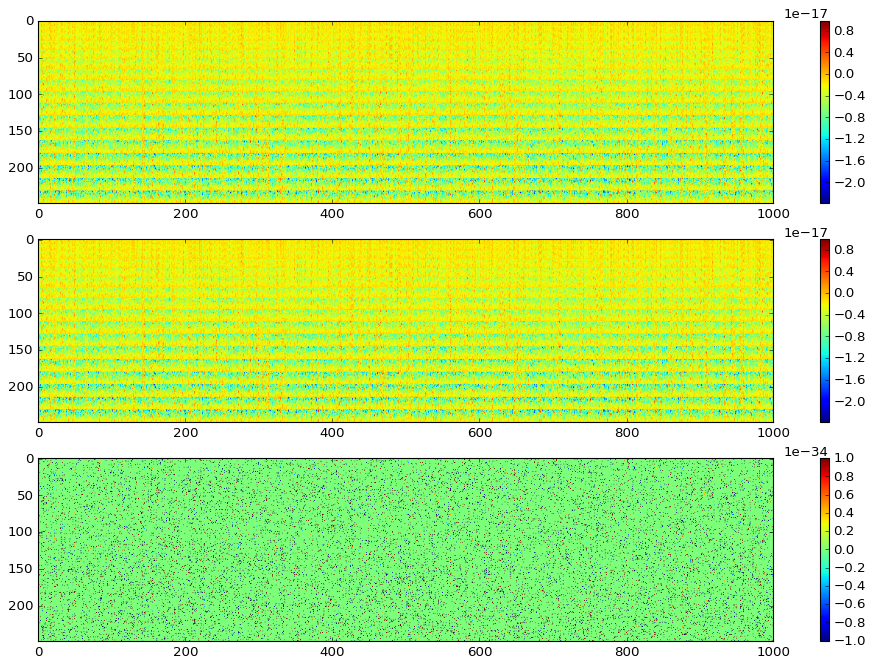

In [16]:
subplot(3,1,1)
imshow(TOD_A)
colorbar()
subplot(3,1,2)
imshow(TOD_B)
colorbar()
subplot(3,1,3)
imshow(TOD_A-TOD_B,vmin=-1e-34,vmax=1e-34)
colorbar()

In [17]:
print(np.std(x0_A), np.std(x0_B), np.std(x0_A-x0_B))
print(np.std(TOD_A), np.std(TOD_B), np.std(TOD_A-TOD_B))

ok = maps_recon_A[0,:,0] != hp.UNSEEN
for iqu in [0,1,2]:
    print(np.std(maps_recon_A[0,ok,iqu]), np.std(maps_recon_B[0,ok,iqu]), np.std(maps_recon_A[0,ok,iqu]-maps_recon_B[0,ok,iqu]))


(62.55947218200857, 62.55947218200857, 0.0)
(2.8167552886587421e-18, 2.8167552886587421e-18, 1.6689280815751596e-34)
(81.784181792680869, 81.785939545251026, 0.079065317939859464)
(2.2550901309726439, 2.248884359419459, 0.089393269160268268)
(2.2514654060414454, 2.2445370439906638, 0.089237669494753591)


Questions:
- Est-ce que ces différences sur les TOD sont normales ? Est-ce que ça peut être des problèmes d'arrondis ? Mais j'aurais pensé qu'ils seraient réptétitifs et qu'on trouverait la même chose exactement...
- Comment une différence aussi petite entre les TOD (de l'ordre de 10^-16) peut elle induire une différence si forte sur les cartes reconstruite ??? de l'ordre de 3 ou 4% ce qui est bien trop pour que ce soit acceptable

On va refaire le même exarcice avec tol=1e-5 au lieu de 1e-4

In [ ]:
import pickle
pickle.dump(maps_recon, open('maps_recon_1e-5.p', 'wb'))

In [ ]:
import pickle
pickle.dump(maps_recon, open('maps_recon_1e-5_bis.p', 'wb'))

On les relit

In [18]:
import pickle
maps_recon_A_m5 = pickle.load( open( "/Users/hamilton/maps_recon_1e-5.p", "rb" ) )
maps_recon_B_m5 = pickle.load( open( "/Users/hamilton/maps_recon_1e-5_bis.p", "rb" ) )
for iqu in [0,1,2]:
    print(np.std(maps_recon_A_m5[0,ok,iqu]), np.std(maps_recon_B_m5[0,ok,iqu]), np.std(maps_recon_A_m5[0,ok,iqu]-maps_recon_B_m5[0,ok,iqu]))


(81.729772424003997, 81.728940086548818, 0.04023689914214728)
(2.0676526255215597, 2.0677766949920731, 0.055654022797685172)
(2.0655899494526935, 2.0650527985915641, 0.054973268526599686)


un peu moins... mis pas beaucoup... c'est vraiment inquiétant...

In [ ]:
On essaie 5e-5

In [ ]:
import pickle
pickle.dump(maps_recon, open('maps_recon_5e-5.p', 'wb'))

In [ ]:
import pickle
pickle.dump(maps_recon, open('maps_recon_5e-5_bis.p', 'wb'))

In [19]:
import pickle
maps_recon_A_m5 = pickle.load( open( "/Users/hamilton/maps_recon_5e-5.p", "rb" ) )
maps_recon_B_m5 = pickle.load( open( "/Users/hamilton/maps_recon_5e-5_bis.p", "rb" ) )
for iqu in [0,1,2]:
    print(np.std(maps_recon_A_m5[0,ok,iqu]), np.std(maps_recon_B_m5[0,ok,iqu]), np.std(maps_recon_A_m5[0,ok,iqu]-maps_recon_B_m5[0,ok,iqu]))


(81.828913535883686, 81.829007781699346, 0.030964829902197663)
(2.0609930237633907, 2.0624337039550795, 0.034190195763879418)
(2.0325429202866245, 2.0335874657468462, 0.034533789392572053)


C'est instable...

Donc au final deux questions:
- pourquoi les TOD pris avec une carte et un pointages identiques sont differents ? (meme de tres peu ~ 1e-16)
- pourquoi une si petit différence résulte en une tres tres grande difféerence sur els cartes, qui plus est tres instable en fonction de la convergence ?

Il faudrait peut être quand même verifier que le pointage est exactement le même... On met donc p.equatorial et aussi p.angle_hwp dans des pickles et on regarde

In [20]:
eqptg_A = pickle.load( open( "/Users/hamilton/equatorial.p", "rb" ) )
eqptg_B = pickle.load( open( "/Users/hamilton/equatorial_bis.p", "rb" ) )
print(minmax(eqptg_A-eqptg_B))

(0.0, 0.0)


In [21]:
hwp_A = pickle.load( open( "/Users/hamilton/hwp.p", "rb" ) )
hwp_B = pickle.load( open( "/Users/hamilton/hwp_bis.p", "rb" ) )
print(minmax(hwp_A-hwp_B))

(0.0, 0.0)


Maintenant un dernier test intéressant: prendre les TOD de la session B et les faire mettre en carte par la session A pour voir ce que ça donne.

In [ ]:
### Sur la machine A
TOD_init = TOD
TOD = pickle.load( open( "/Users/hamilton/TOD_bis.p", "rb" ) )
parameters['tol']=5e-5
maps_recon, cov, nus, nus_edge, maps_convolved = si.reconstruct_maps(TOD, parameters, p, x0=x0)
if int(parameters['nf_sub_rec'])==1: maps_recon=np.reshape(maps_recon, np.shape(maps_convolved))
cov = np.sum(cov, axis=0)
maxcov = np.max(cov)
unseen = cov < maxcov*0.1
maps_recon[:,unseen,:] = hp.UNSEEN
pickle.dump(maps_recon, open('maps_recon_A_TODfromB_5e-5.p', 'wb'))

In [29]:
print TOD_A-TOD_B
print TOD_A

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  1.92592994e-34   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00  -1.92592994e-34]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.92592994e-34
    0.00000000e+00   0.00000000e+00]]
[[ -1.16429055e-18  -2.26491479e-18  -2.25266015e-18 ...,  -2.51535088e-18
   -4.57163188e-19  -9.29499545e-19]
 [ -1.25198022e-18  -2.47721400e-18  -2.15926678e-18 ...,  -2.40279534e-18
   -8.62930543e-19  -1.09390809e-18]
 [ -1.69874228e-18  -1.25509163e-18  -1.99643808e-18 ...,  -1.47497981e-18
   -1.25858072e-18  -

In [28]:
bla = (TOD_A-TOD_B == 0)
print bla.sum()
print bla.shape

228920
(248, 1000)
